In [3]:
import matplotlib.pyplot as plt

def plot_reg(logs, logN, slope, intercept):
    
    # Rysowanie punktów
    plt.scatter(logs, logN, color='blue', label='Punkty danych')
    
    # Rysowanie linii regresji
    plt.plot(logs, slope * logs + intercept, color='red', label=f'Regresja: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel('log(epsilons)')
    plt.ylabel('log(N)')
    plt.legend()
    plt.title('Regresja liniowa dla wymiaru boxowego')
    plt.show()



In [73]:
import numpy as np


def hausdorff_dimension(points, max_box_size=None, min_box_size=None, num_scales=10):

    min_coords = points.min(axis=0)
    max_coords = points.max(axis=0)
    bounding_box_size = np.max(max_coords - min_coords)


    if max_box_size is None:
        max_box_size = bounding_box_size
    if min_box_size is None:
        min_box_size = bounding_box_size / (2 ** num_scales)


    box_sizes = np.logspace(np.log10(max_box_size), np.log10(min_box_size), num_scales)

    def count_boxes(box_size):
        grid_indices = np.floor((points - min_coords) / box_size).astype(int)
        unique_boxes = np.unique(grid_indices, axis=0)
        return len(unique_boxes)

    box_counts = np.array([count_boxes(box_size) for box_size in box_sizes])

    log_box_sizes = np.log(box_sizes)
    log_box_counts = np.log(box_counts)
    slope, intercept = np.polyfit(log_box_sizes, log_box_counts, 1)

    plot_reg(log_box_sizes, log_box_counts, slope, intercept)
    return -slope


In [76]:
import numpy as np
from scipy.stats import linregress


def compute_box_dimension_v2(T, X, epsilons):
    counts = []
    eps = []
    
    for epsilon in epsilons:
        intervals = int(1 / epsilon)
        n_points = int(len(X)/intervals)
        count = 0

        for i in range(int(intervals)):
            in_range = int((np.max(X[i*n_points:(i+1)*n_points-1]) - np.min(X[i*n_points:(i+1)*n_points-1])) / epsilon)
            count += in_range

        if count > 0:
            counts.append(count)
            eps.append(epsilon)

    logs = np.log(1/np.array(eps))
    logN = np.log(counts)

    slope, intercept, _, _, _ = linregress(logs, logN)
    #f
    plot_reg(logs, logN, slope, intercept)
    
    return slope

In [5]:
import numpy as np


def packing_dimension(points, max_box_size=None, min_box_size=None, num_scales=10):

    min_coords = points.min(axis=0)
    max_coords = points.max(axis=0)
    bounding_box_size = np.max(max_coords - min_coords)

    if max_box_size is None:
        max_box_size = bounding_box_size
    if min_box_size is None:
        min_box_size = bounding_box_size / (2 ** num_scales)

    box_sizes = np.logspace(np.log10(max_box_size), np.log10(min_box_size), num_scales)

    def count_boxes(box_size):

        grid_indices = np.floor((points - min_coords) / box_size).astype(int)
        unique_boxes = np.unique(grid_indices, axis=0)

        occupied_boxes = set()
        for idx in range(len(points)):
            grid_idx = tuple(grid_indices[idx])
            occupied_boxes.add(grid_idx)

        return len(occupied_boxes)

    box_counts = np.array([count_boxes(box_size) for box_size in box_sizes])

    log_box_sizes = np.log(box_sizes)
    log_box_counts = np.log(box_counts)
    

    slope, intercept = np.polyfit(log_box_sizes, log_box_counts, 1)


    plot_reg(log_box_sizes, log_box_counts, slope, intercept)
    
    return -slope

In [61]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math


def jpg_to_pixel_array(image_path):
    # Otwórz obraz
    with Image.open(image_path) as img:
        # Upewnij się, że obraz jest w formacie RGB
        img = img.convert("RGBA")
        # Pobierz szerokość i wysokość obrazu
        width, height = img.size
        # Zamień obraz na tablicę pikseli
        pixel_array = []
        for y in range(height):
            row = []
            for x in range(width):
                # Pobierz kolor piksela (R, G, B)
                color = img.getpixel((x, y))
                if(color[3] < 255):
                    row.append((255 , 255 , 255))
                else:
                    row.append((color[0] , color[1] , color[2]))
            pixel_array.append(row)
        return pixel_array

def plot_image_from_pixels(pixel_array):
    # Konwertuj tablicę pikseli do formatu odpowiedniego dla matplotlib
    #height = len(pixel_array)
    #width = len(pixel_array[0])
    # Stwórz numpy array dla efektywności
    import numpy as np
    image_data = np.array(pixel_array, dtype=np.uint8)
    # Wyświetl obraz
    plt.imshow(image_data)
    plt.axis('off')  # Ukryj osie
    plt.show()

def make_points_array_from_black(pixel_array):
    height = len(pixel_array)
    width = len(pixel_array[0])

    print(height , width)
    
    points_list = []

    #points_list.append(((width - width % 2) / 2 , (height - height % 2) / 2))

    for i in range(height):
        for j in range(width):
            if(pixel_array[i][j] == (0 , 0 , 0)):
                points_list.append((width - j , height - i))

    #print(len(points_list))
    return(np.array(points_list))


def generate_cantor_set(N , n, start=0.0, end=1.0):
    points_list = []
    width = 1000
    thickness = 10
    if(n == 0):
        return points_list
    else:
        n_start = math.floor(start * width)
        n_end = math.floor(end * width)
        for i in range(n_start , n_end):
            for j in range(n * 2 * thickness , n * 2 * thickness + thickness):
                points_list.append((i , j))

        segment_length = (end - start) / 3.0
        left_segment = (start, start + segment_length)
        right_segment = (start + 2 * segment_length, end)

        left_points = generate_cantor_set(N , n - 1, *left_segment)

        right_points = generate_cantor_set(N , n - 1, *right_segment)
        
        points_list = points_list + left_points
        points_list = points_list + right_points

        return points_list
    



def plot_points_only(points):
    """
    Funkcja rysuje wykres na podstawie tablicy punktów bez linii łączących i bez osi.
    
    :param points: Lista punktów w formie [(x1, y1), (x2, y2), ...]
    """
    # Rozdziel punkty na osobne listy współrzędnych x i y
    x_coords, y_coords = zip(*points)
    
    # Tworzenie wykresu
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='black', s=0.1, label='Punkty')  # Użycie scatter do rysowania punktów
    plt.axis('off')  # Wyłącz osie
    plt.show()



311 1920


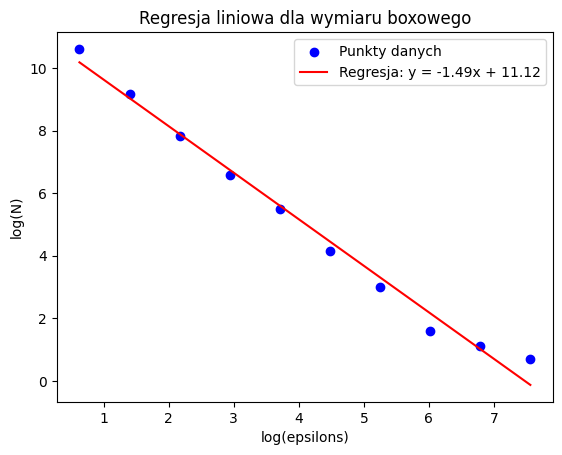

Wymiar hausdorffa: 1.4884064384486062
[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125]


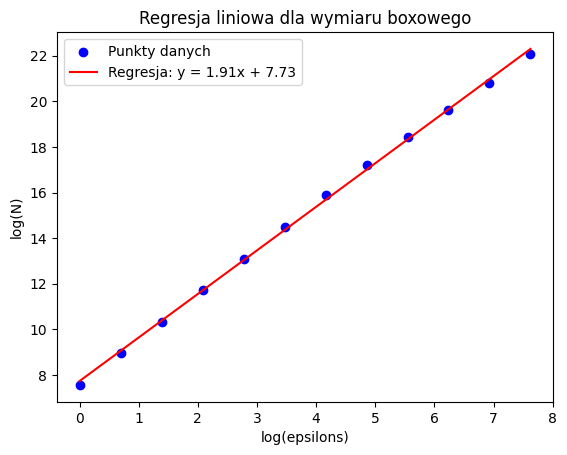

Wymiar boxowy: 1.9110944996580352


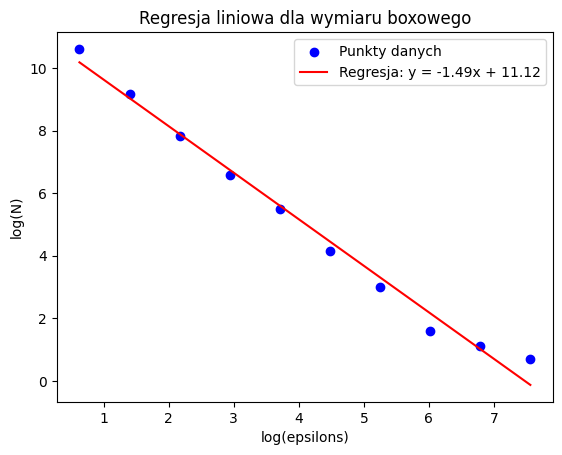

Wymiar packing: 1.4884064384486062


In [79]:
image_path = "../PRO/Fotos/cantor.png"   # Podaj ścieżkę do pliku JPG
pixel_array = jpg_to_pixel_array(image_path)


# punkty z obrazka
points = make_points_array_from_black(pixel_array)

# punkty z generowania cantora
points_list = generate_cantor_set(6 , 6)
points_2 = np.array(points_list)

# Tu jak chcesz wyświtlić obrazek z punktów
#plot_points_only(points)


dimension = hausdorff_dimension(points)
print(f"Wymiar hausdorffa: {dimension}")

epsilons = []
for i in range(12):
    epsilons = epsilons + [1/(2**i)]
print(epsilons)
n = points.shape[0]
T = np.linspace(0, 1, n)
dimension = compute_box_dimension_v2(T , points , epsilons)
print(f"Wymiar boxowy: {dimension}")

dimension = packing_dimension(points)
print(f"Wymiar packing: {dimension}")
